![title](imgs/keras-logo-small.jpg)
## Keras: Deep Learning library for Theano and TensorFlow

# What is Deep learning?

>Deep learning is a machine learning technique that teaches computers to do what comes naturally to humans: learn by example. Deep learning is a key technology behind driverless cars, enabling them to recognize a stop sign, or to distinguish a pedestrian from a lamppost. It is the key to voice control in consumer devices like phones, tablets, TVs, and hands-free speakers. Deep learning is getting lots of attention lately and for good reason. It’s achieving results that were not possible before.

>In deep learning, a computer model learns to perform classification tasks directly from images, text, or sound. Deep learning models can achieve state-of-the-art accuracy, sometimes exceeding human-level performance. Models are trained by using a large set of labeled data and neural network architectures that contain many layers.

                                               

# Overview

>### 1.Keras As A Deeplearning Library 
   * __why keras?__
   
>###  2.Keras Working Pipeline 
   * __Definition__ 
   * __Compilation__ 
   * __Training__ 
   * __Prediction and Evaluation__
   
>### 3.Keras Modules
   * __Some Useful Modules in Keras__
   
>### 4.Applications
   * __Transfer learning/fine tuning__

![title](imgs/keras-tensorflow-logo.jpg)
## Keras Deep Learning library with TensorFlow

>Keras is a minimalist, highly modular neural networks library, written in Python and capable of running on top of either TensorFlow or Theano. 

>It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible delay is key to doing good research.
ref: https://keras.io/

### Why Keras?

>Keras is an API designed for human beings, not machines. Keras follows best practices for reducing cognitive load: it offers consistent & simple APIs, it minimizes the number of user actions required for common use cases, and it provides clear and actionable feedback upon user error.
    
>This makes Keras easy to learn and easy to use. As a Keras user, you are more productive, allowing you to try more ideas than your competition, faster -- which in turn helps you win machine learning competitions.
    
>This ease of use does not come at the cost of reduced flexibility: because Keras integrates with lower-level deep learning languages (in particular TensorFlow), it enables you to implement anything you could have built in the base language. In particular, as tf.keras, the Keras API integrates seamlessly with your TensorFlow workflows.


<img src="imgs/arxiv-mentions.png" width="70%">


# Keras Working Pipeline

## MODEL Definition
There are two types of models available in Keras: the Sequential model and the Model class used with functional API.


### Sequential Model

<div class="alert alert-block alert-warning">
The simplest model is defined in the Sequential class which is a linear stack of Layers. You can create a Sequential model and define all of the layers in the constructor, for example: 
       
       from keras.models import Sequential
       model = Sequential(...)

A more useful idiom is to create a Sequential model and add your layers in the order of the computation you wish to perform, for example:       
       
       from keras.models import Sequential
       model = Sequential()
       model.add(...)
       model.add(...)
       model.add(...)

### Functional API

<div class="alert alert-block alert-warning">
The Keras functional API provides a more flexible way for defining models.

It specifically allows you to define multiple input or output models as well as models that share layers. More than that, it allows you to define ad hoc acyclic network graphs.

Models are defined by creating instances of layers and connecting them directly to each other in pairs, then defining a Model that specifies the layers to act as the input and output to the model,For Example:

                         inputs = Input(shape=(3,))
                         x = Dense(50, activation='relu')(inputs)
                         output = Dense(1, activation = 'sigmoid')(x)
                         n_net = Model(inputs, output)
                         n_net.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                         n_net.fit(x=dat_train, y=y_classifier_train, epochs=10,
                         verbose=1, validation_data=(dat_test, y_classifier_test))

## Model Compilation

>Before training a model, you need to configure the learning process, which is done via the compile method. It receives three arguments:

>* An optimizer. This could be the string identifier of an existing optimizer (such as rmsprop or adagrad), or an instance of the Optimizer class. See: optimizers.
>* A loss function. This is the objective that the model will try to minimize. It can be the string identifier of an existing loss function (such as categorical_crossentropy or mse), or it can be an objective function. See: losses.
>* A list of metrics. For any classification problem you will want to set this to metrics=['accuracy']. A metric could be the string identifier of an existing metric or a custom metric function.


<div class="alert alert-block alert-warning">
### For a multi-class classification problem
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### For a mean squared error regression problem
model.compile(optimizer='rmsprop',
              loss='mse')

### For custom metrics
import keras.backend as K

def mean_pred(y_true, y_pred):
    return K.mean(y_pred)

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy', mean_pred])

## Model Training

<div class="alert alert-block alert-warning">
Keras models are trained on Numpy arrays of input data and labels. For training a model, you will typically use the fit function.
          
          model.fit(x_train, y_train,
          batch_size=batch_size, epochs=5, shuffle=False,
          validation_data=(x_val, y_val))

## Model Prediction and Evaluation

<div class="alert alert-block alert-warning">
.predict() generates output predictions based on the input you pass it (for example, the predicted characters in the MNIST example)
            
            predictions = model.predict(x_test)
            
.evaluate() computes the loss based on the input you pass it, along with any other metrics that you requested in the metrics param when you compiled your model (such as accuracy in the MNIST example)
            
            score = model.evaluate(x_test, y_test, verbose=0)

## Example Model

****
<img src="imgs/Feed-forward.png" width="60%">

## Problem Definition

**Recognize handwritten digits**
<img src="imgs/Examples-from-the-MNIST-dataset.png" width="60%">

## Data

The MNIST database ([link](http://yann.lecun.com/exdb/mnist)) has a database of handwritten digits. 

The training set has $60,000$ samples. 

The test set has $10,000$ samples.

The digits are size-normalized and centered in a fixed-size image. 

The data page has description on how the data was collected. It also has reports the benchmark of various algorithms on the test dataset. 

In [42]:
#import neccessary 
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils
from keras.preprocessing import image
from matplotlib import pyplot as plt
from matplotlib.pyplot import imshow
from keras.applications.imagenet_utils import preprocess_input
%matplotlib inline

## Load Data

In [31]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train/255
X_test = X_test/255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

print('x_train shape:', X_train.shape)
print('x_train shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (60000, 784)
x_train shape: (10000, 784)
60000 train samples
10000 test samples


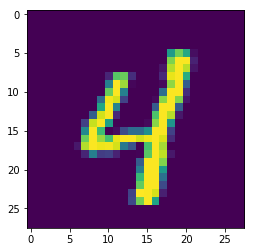

In [15]:
plt.imshow(X_train[50050].reshape(28, 28))

### Define Model

In [32]:
def baseline_model():
# create model
    model = Sequential()
    model.add(Dense(100, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(75,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(50,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(25,kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [33]:
# Training
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=256, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 5s - loss: 1.4603 - acc: 0.4481 - val_loss: 0.6785 - val_acc: 0.8082
Epoch 2/10
 - 2s - loss: 0.7856 - acc: 0.7375 - val_loss: 0.4366 - val_acc: 0.8857
Epoch 3/10
 - 2s - loss: 0.5996 - acc: 0.8260 - val_loss: 0.3000 - val_acc: 0.9276
Epoch 4/10
 - 2s - loss: 0.5035 - acc: 0.8656 - val_loss: 0.2550 - val_acc: 0.9363
Epoch 5/10
 - 2s - loss: 0.4522 - acc: 0.8805 - val_loss: 0.2285 - val_acc: 0.9433
Epoch 6/10
 - 2s - loss: 0.4170 - acc: 0.8913 - val_loss: 0.2194 - val_acc: 0.9452
Epoch 7/10
 - 2s - loss: 0.3855 - acc: 0.8982 - val_loss: 0.2061 - val_acc: 0.9505
Epoch 8/10
 - 2s - loss: 0.3632 - acc: 0.9030 - val_loss: 0.1897 - val_acc: 0.9532
Epoch 9/10
 - 2s - loss: 0.3497 - acc: 0.9076 - val_loss: 0.1897 - val_acc: 0.9538
Epoch 10/10
 - 2s - loss: 0.3321 - acc: 0.9128 - val_loss: 0.1860 - val_acc: 0.9550


In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 75)                7575      
_________________________________________________________________
dropout_2 (Dropout)          (None, 75)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 50)                3800      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 25)                1275      
__________

In [34]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Model Error: %.2f%%" % (100-score[1]*100))

Test loss: 0.18596392909139395
Test accuracy: 0.955
Model Error: 4.50%


# Keras Utilities

>## ImageDataGenerator
>Deep networks need large amount of training data to achieve good performance. To build a powerful image classifier using very little training data, image augmentation is usually required to boost the performance of deep networks. Image augmentation artificially creates training images through different ways of processing or combination of multiple processing, such as random rotation, shifts, shear and flips, etc.
>
Data augmentation powerful and common tool for increasing the dataset size and model generalizability is data augmentation. In fact, every competition winning ConvNet employs the use of data augmentation. Essentially, data augmentation is the process of artificially increasing the size of your dataset via transformations.

>Keras provides the ImageDataGenerator class that defines the configuration for image data preparation and augmentation. This includes capabilities such as:

>   *  Sample-wise standardization.
>   *  Feature-wise standardization.
>   *  ZCA whitening.
>   *  Random rotation, shifts, shear and flips.
>   *  Dimension reordering.
>   *  Save augmented images to disk.

>For More Reference '''https://machinelearningmastery.com/image-augmentation-deep-learning-keras/'''

<div class="alert alert-block alert-warning">
    
    keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-6,
    rotation_range=0.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=K.image_data_format())

### Example

<img src="imgs/cat.jpeg" width="50%">

>*Augmentated Images* 

<img src="imgs/cat_augmentation.png" width="50%">

<img src="imgs/dog_augmentation.png" width="70%">

### Datasets
Keras some builtin datasets.Such as 
* **CIFAR10 small image classification**
* **IMDB Movie reviews sentiment classification**
* **MNIST database of handwritten digits**
* **Boston housing price regression dataset**
* **Fashion-MNIST database of fashion articles**
<img src="imgs/fashion.jpg" width="30%">
                                             Fashion-MNIST database of fashion articles
<img src="imgs/cifar-10.png" width="30%">
                                                CIFAR10 small image classification

## Applications
Keras Applications are deep learning models that are made available alongside pre-trained weights. These models can be used for prediction, feature extraction, and fine-tuning.

Weights are downloaded automatically when instantiating a model. They are stored at ~/.keras/models/.

### Transfer Learning/Fine Tuning

>What is Transfer Learning?

>* Transfer learning, is a research problem in machine learning that focuses on storing knowledge gained while solving one problem and applying it to a different but related problem.

>Why Transfer Learning?

>* In practice a very few people train a Convolution network from scratch (random initialisation) because it is rare to get enough dataset. So, using pre-trained network weights as initialisations or a fixed feature extractor helps in solving most of the problems in hand.
>* Very Deep Networks are expensive to train. The most complex models take weeks to train using hundreds of machines equipped with expensive GPUs.

>It has become the norm, not the exception, for researchers and practitioners alike to use transfer learning and fine-tuning, that is, transferring the network weights trained on a previous task like ImageNet to a new task.

<img src="imgs/fine_tuning.png" width="70%">
                                          
                                        Taken from http://cs231n.github.io/

>The figure above and the bullets below describe some general advice for when to choose which approach.

>   *  Similar & small dataset: avoid overfitting by not fine-tuning the weights on a small dataset, and use extracted features from the highest levels of the ConvNet to leverage dataset similarity.
  *   Different & small dataset: avoid overfitting by not fine-tuning the weights on a small dataset, and use extracted features from lower levels of the ConvNet which are more generalizable.
  *   Similar & large dataset: with a large dataset we can fine-tune the weights with less of a chance to overfit the training data.
  *   Different & large dataset: with a large dataset we again can fine-tune the weights with less of a chance to overfit.

<img src="imgs/dog_transfer.png" width="70%">

## Examples

In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = 'imgs/horse.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


40960/35363 [==================================] - 1s 33us/step
Predicted: [('n02389026', 'sorrel', 0.98982763), ('n02422106', 'hartebeest', 0.0071356916), ('n02087394', 'Rhodesian_ridgeback', 0.0005791643)]
